In [2]:
# a. Import required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import layers, models, losses 


In [3]:
# b. Upload / access the dataset 
# Using MNIST dataset for anomaly detection (digits) 
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data() 


In [6]:
# Normalize and reshape 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0 
x_train = x_train.reshape((len(x_train), 28, 28, 1)) 
x_test = x_test.reshape((len(x_test), 28, 28, 1)) 


In [8]:
# c. Encoder converts it into latent representation 
latent_dim = 64 

encoder_input = layers.Input(shape=(28, 28, 1)) 
x = layers.Flatten()(encoder_input) 
x = layers.Dense(128, activation="relu")(x) 
x = layers.Dense(64, activation="relu")(x) 
latent = layers.Dense(latent_dim, activation="relu")(x) 

encoder = models.Model(encoder_input, latent, name="encoder")


In [10]:
# d. Decoder networks convert it back to the original input 
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(decoder_input)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
decoder_output = layers.Reshape((28, 28, 1))(x)

decoder = models.Model(decoder_input, decoder_output, name="decoder")


In [12]:
# Autoencoder = Encoder + Decoder 
autoencoder_input = encoder_input 
encoded = encoder(autoencoder_input) 
decoded = decoder(encoded) 
autoencoder = models.Model(autoencoder_input, decoded, name="autoencoder") 

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       112,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       113,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,512 (884.81 KB)

 Trainable params: 226,512 (884.81 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# e. Compile the model with Optimizer, Loss, and Evaluation Metrics 
autoencoder.compile(optimizer="adam", loss="mse", metrics=["accuracy"]) 
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 64)             │       112,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │       113,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,512 (884.81 KB)

 Trainable params: 226,512 (884.81 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model 
history = autoencoder.fit( 
    x_train, x_train,
    epochs=10, 
    batch_size=256, 
    shuffle=True, 
    validation_data=(x_test, x_test) 
) 


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8135 - loss: 0.0120 - val_accuracy: 0.8130 - val_loss: 0.0117
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8137 - loss: 0.0116 - val_accuracy: 0.8130 - val_loss: 0.0112
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8138 - loss: 0.0112 - val_accuracy: 0.8128 - val_loss: 0.0108
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8139 - loss: 0.0108 - val_accuracy: 0.8129 - val_loss: 0.0104
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8139 - loss: 0.0106 - val_accuracy: 0.8131 - val_loss: 0.0102
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8140 - loss: 0.0103 - val_accuracy: 0.8132 - val_loss: 0.0099
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8141 - loss: 0.0100 - val_accuracy: 0.8131 - val_loss: 0.0097
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8141 - loss: 0.0098 - val_accuracy: 0.

In [22]:
# Evaluate Reconstruction Error (Anomaly Detection) 
reconstructions = autoencoder.predict(x_test) 
mse = np.mean(np.power(x_test - reconstructions, 2), axis=(1,2,3)) 


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [24]:
# Set a threshold for anomalies (95th percentile here) 
threshold = np.percentile(mse, 95) 
print("Reconstruction error threshold:", threshold) 


Reconstruction error threshold: 0.01887030377984046


In [26]:
# Example anomaly detection: classify samples as normal or anomaly 
anomalies = mse > threshold 
print("Number of anomalies detected:", np.sum(anomalies)) 


Number of anomalies detected: 500


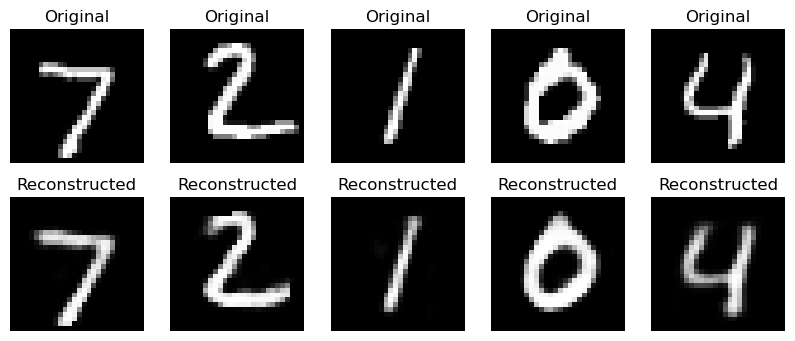

In [28]:
# Visualize some reconstructions 
n = 5 
plt.figure(figsize=(10,4)) 
for i in range(n): 
    # Original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")  
    plt.title("Original") 
    plt.axis("off") 
    # Reconstructed 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructions[i].reshape(28,28), cmap="gray")  
    plt.title("Reconstructed") 
    plt.axis("off") 
plt.show()
